# Descripción

Generar equipos de trabajo a partir de gustos y preferencias. Los equipos son de mínimo 5
elementos y no más de 7. 

Se debe tener una población a escoger entre 20 a 30 personas.

Las preguntas de afinidades son:

1. Cuál es su deporte favorito? (futbol, basquet, voley, natacion, karate, otros)
2. Que música le gusta ? (salsa, rock, bachata, regaetton, merengue, technocumbia, folklorica, otros)
3. Que danza le gusta de preferencia? (salsa, rock, bachata, regaetton, merengue, technocumbia, folklorica, otros)
4. Toca algún instrumento? (guitarra, bateria, piano, saxo, no toca, otros)
5. Cual es su club favorito? (x, y, z, d, p)
6. Cual es su hobbie favorito?(cine, visitar museos, viajar, oratoria, videojuegos, conciertos, otros)

## Especificaciones
Al menos debe tener 2 características afines para estar en el equipo de trabajo, se puede
contabilizar a favor el "otros".

El Sistema al correr debe generar los equipos de trabajo, pero en otra corrida puede generar
otros equipos de trabajo, porque se puede realizar otra combinación dependiendo de la data.

Su sistema debe dejar ingresar otras preguntas de preferencias o gustos,buscar que acondicionar
los datos al problema, está orientados a damas y varones.

## Consideraciones que se están tomando

### Sobre los requisitos para pertencer a un equipo

Se está tomando que para pertenecer a un equipo se debe tener al menos 2 características en común con al menos un miembro del equipo.

<p><p style="page-break-after:always;"></p></p>

# Código

## Librerías

In [29]:
import os
import pandas as pd
import openpyxl
from openpyxl import Workbook
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
from IPython.display import display, HTML
import warnings

In [30]:
# Ignorar las advertencias de tipo DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

<p><p style="page-break-after:always;"></p></p>

## Gestionar datos

### Clase Persona

In [31]:
class Persona():
    ruta_archivo = "personas.xlsx"  # Ruta al archivo de datos

    def __init__(self, nombre, deporte=None, musica=None, danza=None, instrumento=None, club=None, hobbie=None):
        # Asigna el nombre y los gustos opcionales a una persona
        self.nombre = nombre
        self.deporte = deporte
        self.musica = musica
        self.danza = danza
        self.instrumento = instrumento
        self.club = club
        self.hobbie = hobbie

    def __str__(self):
        # Devuelve el nombre de la persona en formato de texto
        return f"{self.nombre}"

    def get_gustos_str(self):
        # Devuelve los gustos de la persona como una cadena de texto
        return f"{self.deporte}, {self.musica}, {self.danza}, {self.instrumento}, {self.club}, {self.hobbie}"

    def tiene_afinidad(self, persona2):
        # Comprueba si la persona actual comparte al menos dos gustos con otra persona
        cont = 0
        for gusto in self.__dict__.keys():
            if gusto == 'nombre':
                continue
            if (getattr(self, gusto) == getattr(persona2, gusto)):
                cont += 1
            if cont == 2:
                return True
        return False

    def guardar(self):
        # Guarda los datos de la persona en el Excel
        datos_persona = list(self.__dict__.values())

        if not os.path.isfile(self.ruta_archivo):
            workbook = Workbook()  # Crea un nuevo archivo de Excel si no hubiera uno
            hoja = workbook.active
            hoja.append(list(self.__dict__.keys()))  # Agrega los nombres de los atributos como la primera fila
        else:
            workbook = openpyxl.load_workbook(self.ruta_archivo)  # Abre el archivo existente
            hoja = workbook.active

        hoja.append(datos_persona)  # Agrega los datos de la persona como una nueva fila
        workbook.save(self.ruta_archivo)  # Guarda los cambios en el archivo


### Generar y cargar datos de forma aleatoria
El siguiente código genera y carga datos de forma aleatoria utilizando una lista de nombres predefinida:

In [32]:
nombres = [
    "Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Marta",
    "José", "Lucía", "Andrés", "Paula", "Miguel", "Valentina", "Javier", "Camila", "Pablo", "Elena",
    "Fernando", "Isabella", "Ricardo", "Julia", "Gabriel", "Victoria", "Alejandro", "Gabriela", "Santiago", "Daniela",
    "Raúl", "Natalia", "Roberto", "Olivia", "Esteban", "Jimena", "Francisco", "Antonella", "Daniel", "Carolina",
    "Gonzalo", "Ángela", "Arturo", "Clara", "Emilio", "Adriana", "Hugo", "Florencia", "Enrique", "Beatriz",
    "Lorenzo", "Constanza", "Renato", "Daniella", "Rodrigo", "Paulina", "Sebastián", "Agustina", "Josué", "Martina",
    "Oscar", "Catalina", "Adrián", "Rosario", "Simón", "Juliana", "Mateo", "Renata", "Rafael", "Isabel",
    "Víctor", "Carmen", "Diego", "Mariana", "Emmanuel", "Abril", "Ignacio", "Emily", "Álvaro", "Melissa",
    "Ramón", "Valeria", "César", "Amanda", "Eduardo", "Luciana", "Nicolás", "Danielle", "Alberto", "Alejandra",
    "Tomás", "Brenda", "Luis", "Gloria", "Ulises", "Jennifer", "Jorge", "Celeste", "Raúl", "Patricia"
]

def generar_datos_aleatorios(n, nombres_list):
    deportes = ["futbol", "basquet", "voley", "natacion", "karate", "otros"]
    musicas = ["salsa", "rock", "bachata", "regaetton", "merengue", "technocumbia", "folklorica", "otros"]
    danzas = ["salsa", "rock", "bachata", "regaetton", "merengue", "technocumbia", "folklorica", "otros"]
    instrumentos = ["guitarra", "bateria", "piano", "saxo", "no toca", "otros"]
    clubes = ["x", "y", "z", "d", "p"]
    hobbies = ["cine", "visitar museos", "viajar", "oratoria", "videojuegos", "conciertos", "otros"]

    personas = []
    for i in range(1, n+1):
        nombre = random.choice(nombres_list)
        deporte = random.choice(deportes)
        musica = random.choice(musicas)
        danza = random.choice(danzas)
        instrumento = random.choice(instrumentos)
        club = random.choice(clubes)
        hobbie = random.choice(hobbies)

        persona = Persona(nombre, deporte, musica, danza, instrumento, club, hobbie)
        persona.guardar()  # Guarda cada persona en el archivo excel
        personas.append(persona)
    return personas

### Leer datos del excel

In [33]:
def get_personas_desde_excel(ruta_archivo):
    df = pd.read_excel(ruta_archivo)
    personas = []
    
    for _, row in df.iterrows():
        persona = Persona(row['nombre'], row['deporte'], row['musica'], row['danza'], row['instrumento'], row['club'], row['hobbie'])
        personas.append(persona)
        
    return personas

<p><p style="page-break-after:always;"></p></p>

### Borrar datos del excel

In [34]:
def borrar_datos_excel(ruta_archivo):
    if os.path.exists(ruta_archivo):
        df = pd.DataFrame(columns=['nombre', 'deporte', 'musica', 'danza', 'instrumento', 'club', 'hobbie'])
        df.to_excel(ruta_archivo, index=False)
    else:
        print(f'El archivo {ruta_archivo} no existe.')

## Crear Grafo de personas

### Crear grafo

In [35]:
def crear_grafo(personas):
    G = nx.Graph()  # Crea un objeto de grafo vacío
    G.add_nodes_from(personas)  # Agrega los nodos al grafo

    # Revisa todas las combinaciones posibles de personas en el grafo
    for persona1, persona2 in itertools.combinations(personas, 2):
        if persona1.tiene_afinidad(persona2):  # Verifica si hay afinidad entre las personas
            G.add_edge(persona1, persona2)  # Agrega una arista entre dos personas si hay afinidad

    return G


### Graficar grafo

In [36]:
def graficar_grafo_no_dirigido_simple(G, nodos_especiales=[]):
    ax = plt.gca()
    pos = nx.spring_layout(G, k=2)  # Obtiene la posición de los nodos utilizando el algoritmo de spring layout
    opciones = {
        'pos': pos,
        'edge_color': '#808080',  # Color de las aristas
        'arrows': True,  # Flechas en las aristas
        'ax': ax,
        'connectionstyle': "arc3,rad=0",
        'edgelist': G.edges(),
    }

    nx.draw_networkx_edges(G, **opciones)  # Dibuja las aristas del grafo
    nx.draw_networkx_labels(G, pos, font_size=8,
                            font_color='black', font_weight='bold')  # Dibuja las etiquetas de los nodos

    # Separa los nodos en nodos especiales y nodos regulares, y los dibuja con diferentes colores
    nodos_especiales = set(nodos_especiales)
    nodos_regulares = [nodo for nodo in G.nodes if nodo not in nodos_especiales]
    nx.draw_networkx_nodes(G, pos, nodelist=nodos_especiales, node_color='red', node_size=900, alpha=1)  # Nodos especiales en rojo
    nx.draw_networkx_nodes(G, pos, nodelist=nodos_regulares, node_color='#0080FF', node_size=900, alpha=1)  # Nodos regulares con color original
    
    # Obtiene las aristas que conectan dos nodos especiales y las aristas regulares
    aristas_especiales = [(u, v) for (u, v) in G.edges if u in nodos_especiales and v in nodos_especiales]
    aristas_regulares = [(u, v) for (u, v) in G.edges if (u, v) not in aristas_especiales and (v, u) not in aristas_especiales]
    
    # Dibuja las aristas especiales con un color diferente
    nx.draw_networkx_edges(G, pos, edgelist=aristas_especiales, edge_color='red', arrows=True, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=aristas_regulares, edge_color='#808080', arrows=True, ax=ax)

    etiquetas_aristas = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, etiquetas_aristas)  # Dibuja las etiquetas de las aristas

    plt.axis('off')
    plt.show()  # Muestra el gráfico


<p><p style="page-break-after:always;"></p></p>

## Encontrar equipos

### DFS (Depth First Search) Limitado

In [37]:
def dfs_limitado(grafico, inicio, max_nodos):
    pila = [inicio]  # Inicializa una pila con el nodo inicial
    visitados = []  # Lista para almacenar los nodos visitados

    while pila and len(visitados) < max_nodos:  # Mientras haya nodos en la pila y no se haya alcanzado el límite máximo de nodos visitados
        nodo = pila.pop()  # Extrae un nodo de la pila
        if nodo not in visitados:  # Si el nodo no ha sido visitado
            visitados.append(nodo)  # Agrega el nodo a la lista de visitados
            pila.extend(n for n in grafico.neighbors(nodo) if n not in visitados)  # Agrega a la pila los vecinos no visitados del nodo actual

    return visitados  # Cuando termina devuelve la lista de nodos visitados


### Encontrar subgrafos conexos de minimos 5 nodos y maximo 7 nodos

In [38]:
def encontrar_subgrafos_conexos(graph, min_nodes=5, max_nodes=7, print_process=True):
    subgrafos = []
    graph_copy = graph.copy()

    while len(graph_copy.nodes) >= min_nodes:

        # Seleccionar un nodo aleatorio para empezar
        start_node = random.choice(list(graph_copy.nodes))

        # Realizar un DFS para encontrar un subgrafo conexo
        subgraph_nodes = dfs_limitado(graph_copy, start_node, max_nodes)

        # Si el subgrafo tiene suficientes nodos, añadirlo a la lista de subgrafos
        if len(subgraph_nodes) >= min_nodes:
            subgrafos.append(graph.subgraph(subgraph_nodes))
            
            if (print_process):
                # Imprimir grafo con los nodos removidos en rojo
                print('Nodo Inicial:', start_node)
                # print('Nodos retirados:', [str(node) for node in subgraph_nodes])
                graficar_grafo_no_dirigido_simple(graph_copy, subgraph_nodes)

        # Quitar los nodos del subgrafo de la copia del grafo original
        graph_copy.remove_nodes_from(subgraph_nodes)

    # plot_graph(graph_copy)
    return subgrafos

<p><p style="page-break-after:always;"></p></p>

### Imprimir equipos

In [39]:
def imprimir_equipos(subgrafos, imprimir_tabla=True, imprimir_grafo=True):
    print(f'Se encontraron {len(subgrafos)} equipos:')  # Imprime la cantidad de equipos encontrados
    for i, subgrafo in enumerate(subgrafos):
        if imprimir_tabla:
            print(f'Equipo {i+1}:')  # Imprime el número de equipo
            tabla = []
            for persona in subgrafo.nodes:
                tabla.append([persona.nombre, persona.deporte, persona.musica, persona.danza, persona.instrumento, persona.club, persona.hobbie])

            headers = ["Nombre", "Deporte", "Música", "Danza", "Instrumento", "Club", "Hobbie"]
            df = pd.DataFrame(tabla, columns=headers)
            display(HTML(df.to_html(index=False, classes='table-bordered table-striped')))  # Imprime una tabla con los datos de las personas en el equipo
        else:
            print(f'Equipo {i+1}: {[str(persona) for persona in subgrafo.nodes]}')  # Imprime los nombres de las personas en el equipo

        if imprimir_grafo:
            graficar_grafo_no_dirigido_simple(subgrafo)  # Grafica el subgrafo del equipo



<p><p style="page-break-after:always;"></p></p>

# Ejecución

Se obtienen los datos del excel

In [40]:
# personas = get_personas_desde_excel(Persona.ruta_archivo)
personas = generar_datos_aleatorios(50, nombres)

Se crea un grafo donde cada nodo es una persona. Si 2 personas tienen afinidad, se crea una arista entre ellas.

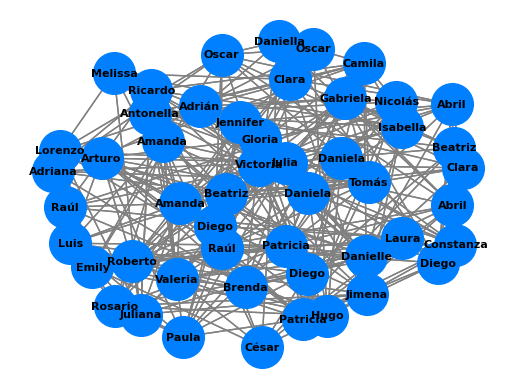

In [41]:
G = crear_grafo(personas)
graficar_grafo_no_dirigido_simple(G)

Podemos ver que un equipo valido está conformado por nodos (integrantes) que están conectados con al menos un nodo del equipo. Es decir un equipo válido es un subgrafo conexo.

Podemos encontrar equipos válidos separando subgrafos conexos a través de DFS (Depth First Search). Dado a que deben ser mínimo 5 y máximo 7 integrantes, limitaremos el DFS a un máximo de 7 nodos y descartaremos los subgrafos que tengan menos de 5 nodos.

Tomamos un nodo (persona) al azar del grafo y empezamos de DFS con un máximo de 7 nodos. Si el subgrafo resultante tiene menos de 5 nodos, descartamos el subgrafo. Si tiene 5 o más nodos, lo guardamos como un equipo valido y eliminamos sus nodos del grafo original.

<p><p style="page-break-after:always;"></p></p>

Nodo Inicial: Roberto


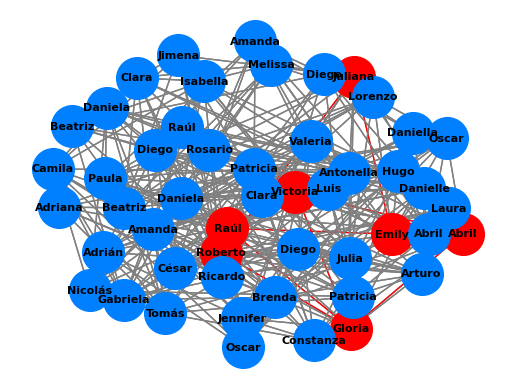

Nodo Inicial: Isabella


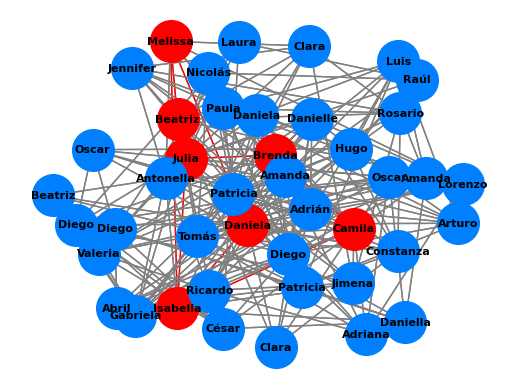

Nodo Inicial: Daniella


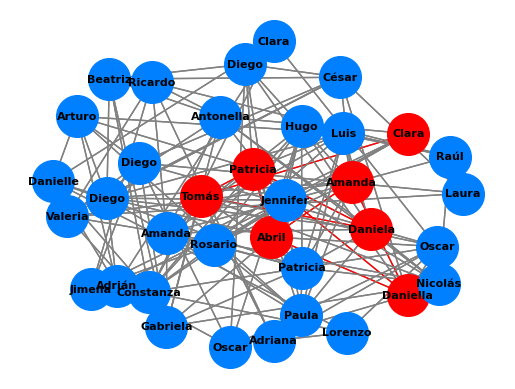

Nodo Inicial: Danielle


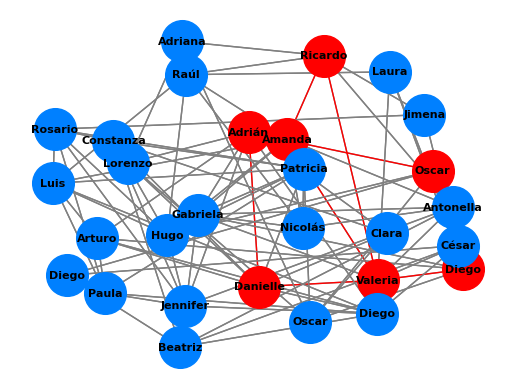

Nodo Inicial: Lorenzo


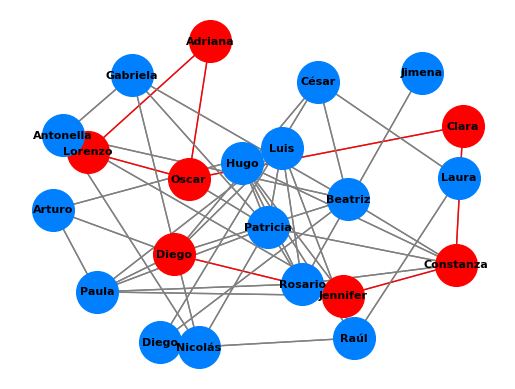

Nodo Inicial: Raúl


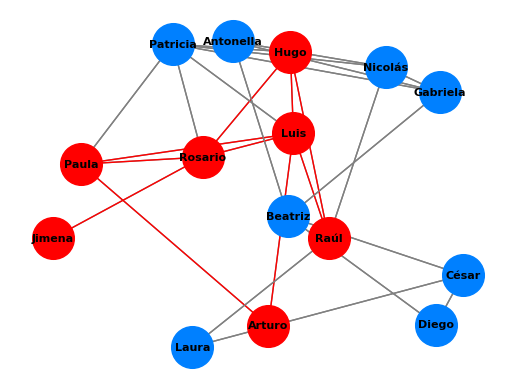

Nodo Inicial: Patricia


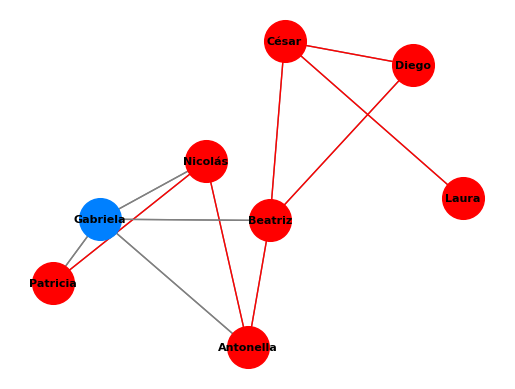

In [42]:
subgrafos = encontrar_subgrafos_conexos(G, min_nodes=5, max_nodes=7, print_process=True)

<p><p style="page-break-after:always;"></p></p>

Imprimimos los equipos válidos encontrados.

Se encontraron 7 equipos:
Equipo 1:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Roberto,futbol,salsa,salsa,otros,d,visitar museos
Juliana,basquet,salsa,technocumbia,no toca,d,viajar
Victoria,otros,technocumbia,technocumbia,bateria,y,conciertos
Emily,basquet,bachata,regaetton,guitarra,d,conciertos
Gloria,otros,regaetton,salsa,bateria,z,visitar museos
Raúl,karate,folklorica,regaetton,bateria,z,conciertos
Abril,otros,technocumbia,folklorica,piano,p,visitar museos


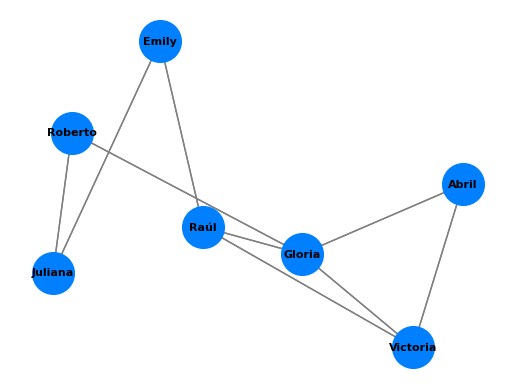

Equipo 2:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Daniela,voley,technocumbia,rock,no toca,x,conciertos
Camila,voley,folklorica,regaetton,otros,y,oratoria
Julia,natacion,salsa,salsa,no toca,z,oratoria
Isabella,futbol,technocumbia,bachata,no toca,y,oratoria
Brenda,voley,regaetton,salsa,otros,z,otros
Beatriz,futbol,salsa,rock,piano,z,visitar museos
Melissa,futbol,otros,rock,no toca,y,viajar


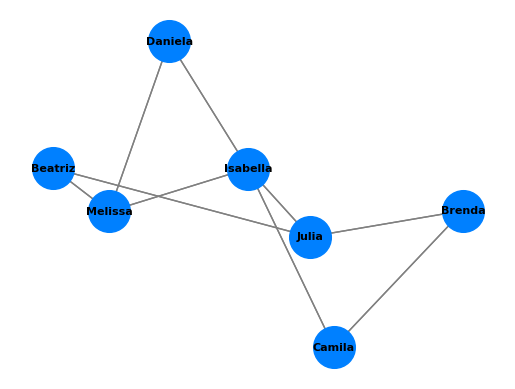

Equipo 3:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Amanda,karate,bachata,technocumbia,guitarra,p,otros
Tomás,voley,folklorica,regaetton,piano,x,visitar museos
Clara,futbol,salsa,otros,piano,y,visitar museos
Daniella,natacion,merengue,technocumbia,bateria,p,videojuegos
Patricia,karate,merengue,regaetton,bateria,x,cine
Daniela,voley,folklorica,bachata,guitarra,x,cine
Abril,futbol,merengue,regaetton,guitarra,p,otros


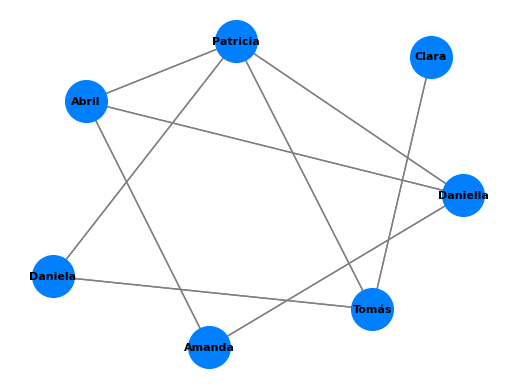

Equipo 4:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Ricardo,voley,regaetton,folklorica,no toca,d,oratoria
Oscar,natacion,folklorica,merengue,otros,p,conciertos
Amanda,voley,regaetton,regaetton,no toca,x,viajar
Diego,natacion,rock,salsa,otros,d,otros
Valeria,voley,bachata,salsa,no toca,d,otros
Adrián,otros,otros,rock,otros,y,conciertos
Danielle,otros,technocumbia,salsa,no toca,z,conciertos


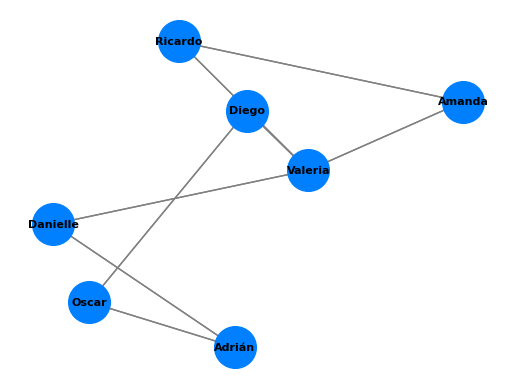

Equipo 5:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Constanza,otros,technocumbia,merengue,bateria,x,visitar museos
Oscar,natacion,rock,regaetton,piano,p,conciertos
Diego,otros,otros,bachata,guitarra,z,otros
Adriana,voley,rock,merengue,piano,z,oratoria
Lorenzo,basquet,rock,rock,no toca,z,conciertos
Clara,otros,technocumbia,rock,piano,p,cine
Jennifer,otros,salsa,merengue,guitarra,y,visitar museos


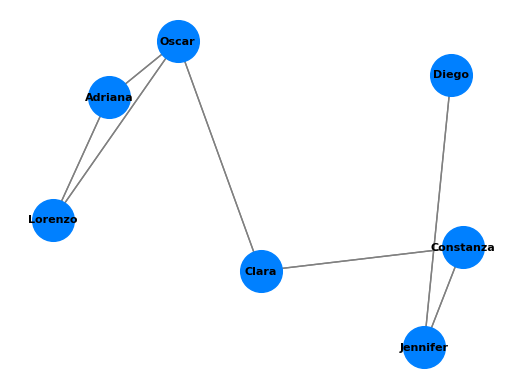

Equipo 6:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Paula,karate,salsa,technocumbia,guitarra,z,cine
Luis,karate,regaetton,bachata,guitarra,x,cine
Arturo,karate,otros,salsa,otros,z,cine
Rosario,karate,salsa,merengue,guitarra,d,visitar museos
Jimena,futbol,salsa,folklorica,otros,d,oratoria
Hugo,futbol,regaetton,merengue,guitarra,x,conciertos
Raúl,natacion,regaetton,otros,saxo,x,oratoria


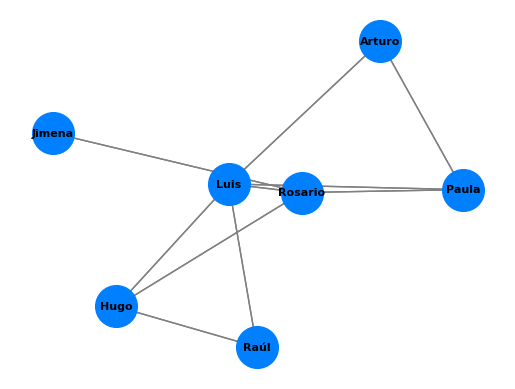

Equipo 7:


Nombre,Deporte,Música,Danza,Instrumento,Club,Hobbie
Antonella,voley,salsa,bachata,no toca,y,videojuegos
Beatriz,basquet,technocumbia,bachata,bateria,y,otros
César,natacion,bachata,bachata,bateria,d,otros
Laura,natacion,bachata,salsa,saxo,d,viajar
Nicolás,voley,salsa,regaetton,saxo,x,videojuegos
Diego,karate,folklorica,folklorica,bateria,p,otros
Patricia,karate,technocumbia,regaetton,guitarra,x,conciertos


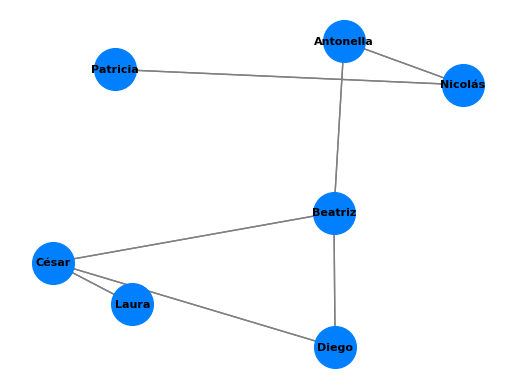

In [43]:
imprimir_equipos(subgrafos, imprimir_tabla=True, imprimir_grafo=True)